# Jorge Leonardo López Agredo
## cod: 2218061 
### Modelado Matemático II. Prof: David Sierra

En el presente Notebook se presentan algunas ideas básicas sobre el modelado de la transferencia de calor por difusión bajo diferentes condiciones de contorno, en el cuál se busca responder de manera básica a preguntas cómo por ejemplo:
1) ¿Cuál es el problema?, 2) ¿Cuál es la hipótesis?, 3) ¿Cómo se define el problema idealmente, 4) Suposiciones teóricas del módelo, 5) ¿Cómo se establecen las variables a medir para resolver el problema?, 6) ¿Cuál es la metodología computacional para resolver el problema? y 7) ¿Qué hace el modelo y que resultados son esperados (o obtenidos)?.

# MOTIVACIÓN:

**Cuando se está implementado una EDP vía métodos numéricos surgen preguntas cómo: 1)¿Cómo saber a partir de lal implementación de un esquema numérico si *funciona bien o no*, dado que no conocemos nada del problema físico que se está modelando? es decir, si no sabemos que esperar de su comportamiento, ¿cómo evaluamos su funcionamiento?**

Finalmente, se presentan algunos códigos básicos para poder ejecutar los **esquemas de diferencias finitas (EDF)** por el método de Euler implícito (B.E) y Euler explicito (F.E).

Los problemas a estudiar es:
# Condiciones de contorno Direchlet homogéneas, material homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=u(L)=0
\end{cases}
$$


# Algunas ideas sobre la deducción de la ecuación de Calor.

# Leyes generales y leyes constitutivas
*Definición 1.1* **(Calor)**. Es la energía que se trasmite de un cuerpo a otro, en virtud
únicamente de la diferencia de temperatura entre ellos, y se denota $Q$.

*Definición 1.2* **(Calor Específico)**. Si un cuerpo de masa $m$ tiene una capacidad
térmica $C$, el calor específico, $c$ del material, que constituye un cuerpo está dada por
$$c =\dfrac{C}{m}
$$
Es una constante y respesenta la cantidad de calor necesaria para elevar la temperatura
de un cuerpo de masa $m$.

*Definición 1.3* **(Calor absorvido por un cuerpo)**. la cantidad de calor $\Delta Q$ absorvida o liberada por un cuerpo de masa $m$ y calor específico $c$, cuando su temperatura
varía en $\Delta t$, se calcula por la relación
$$\Delta Q = cm \Delta t.$$

*Teorema 1.4* **(Primera ley de la termodinámica (Conservación de la Energía))**.
Cuando cierta cantidad de calor $Q$ es absorvida o cedida por un sistema, y un trabajo $T$
es realizado por el sistema o sobre él, la variación de la energía interna, $\Delta U$ del sistema
está dada por
$$\Delta U = Q − T.$$

*Teorema 1.5* **(Ley de la Fourier(Conductividad térmica))**. El flujo de transferencia
de calor por conducción en un medio isótropo es proporcional y de sentido contrario al gradiente de temperatura en esa dirección.
$$Q = −k \nabla T$$
donde $k$ es una constante de proporcionalidad, llamada conductividad térmica.
**Observación:** Si $k = k(x)$ no es constante, se dice que el medio no es isótropo.

Considere un dominio (abierto y conexo) $\Omega  \subseteq \mathbb{R}^n$ y $t \in [0,T]$, denotaremos por: 
$u= u(x,t)$ la temperatura de la barra en una posición $x$ en un instante de tiempo $t$.
$Q=Q(x,t)$ como el fluno de calor en una dirección positiva para la posición $x$ y el tiempo $t$.
Y, considere una barra fina de longitud $L$, sección transversal $S$, completamente aislada del exterior y compuesta del mismo material:
<img width="80%" src="../figures/Volumen_de_Control.png"/> 
Si aplicamos la primera ley de la termodinámica sobre el segmento $x+\Delta x$ denominado como $\Sigma$ y llamado **Volumen de control**, la variación de la energía interna está dada por:
$$ \dfrac{\partial Q}{\partial t}= Q(x, t)S − Q(x + \Delta x, t)S,$$
donde $Q(x, t) $ es el flujo calor entrante y $Q(x + \Delta x, t)$ el flujo de calor saliente.

Por otro lado, el calor absorvido (también llamado Energía Calorífica) por un cuerpo está dado por:
$$Q(x, t) = \lambda mu(x, t)$$
donde $m$ es la masa y $\lambda$ el calor específico.
Derivando con respecto al tiempo y reemplazando la masa $m = \rho S\Delta x$ se tiene:
$$ \dfrac{\partial Q}{\partial t}= = \lambda \rho S\Delta x \dfrac{\partial u}{\partial t},
$$
siendo $S\Delta x $ el volumen del Volumen de Control y $\rho$ la densidad de la barra.
Igualando las expresiones se obtiene:
$$\lambda \rho S\Delta x \dfrac{\partial u}{\partial t}= Q(x, t)S − Q(x + \Delta x, t)S$$
Dividendo la anterior expresión por $S\Delta x, $ y extraemos el signo menos como factor común del miembro de la derecha nos
queda
$$\lambda \rho  \dfrac{\partial u}{\partial t}=-\dfrac{Q(x + \Delta x, t) −Q(x, t)}{\Delta x}=- \dfrac{\partial Q}{\partial x}. $$
Por su parte, la ley de conducción de calor, señala que el flujo de calor se translada en dirección opuesta al gradiente y es proporcional a él, esto es: 
$Q(x,t) = -k\dfrac{\partial u}{\partial x}$. Reemplazando en la anterior ecuación obtenemos una deducción de la ecuación de calor unidimensional:
$$ \dfrac{\partial u}{\partial t}= \alpha^2 \dfrac{\partial^2 u}{\partial x^2},$$
siendo $ \alpha^2 = \dfrac{k}{\lambda \rho}$, que en la implementación numérica se considerará simplemente como $k$, lo anterior es válido por ejemplo, considerando $\lambda \rho =1$.

# Observaciones finales:

El problema se puede generalizar a varias dimensiones a saber  con $n = 2,3$ tenemos  
$$ \dfrac{\partial u}{\partial t}= \alpha^2 \Delta u.$$

Adicionalmente, si $x \in \mathbb{R}^n$  y la función de conductividad térmica $k = k(x)$, relacionado con la condicción de calor dependiente del material no es constante, tenemos que:
$$ \lambda \rho \dfrac{\partial u}{\partial t}= -\nabla(k(x)\nabla u).$$

 Adicionalmente, si consideramos otros tipos de flujo de calor, como por ejemplo
# flujo de calor por convección-difusión
donde el calor es transportado por el movimiento del material, a saber, fluidos o sólidos que se deforman mediante un campo de velocidades $V = V(x,t) \in \mathbb{R}^n$ entonces el flujo total se descompone como la suma de flujos, es decir, **el flujo convectivo** más **el flujo difusivo**
$$Q(x,t) = \lambda uV-k\nabla u,$$
donde, La *ley constitutiva* conocida como **Ley de Transporte de Reynolds** afirma que la variable (calor) es transportada por el campo de velocidades del material. Así, la EDP que modela este fenómeno físico está dada por
$$ \lambda \dfrac{\partial u}{\partial t}+\nabla \dot Q= f$$
siendo $f=f(x,t)$ términos de reacción, conocidos como fuentes o sumideros.
Obteniendo:
$$ \lambda \dfrac{\partial u}{\partial t}=\nabla(\lambda(x) uV) -\nabla(k(x)\nabla u).$$

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline


In [42]:
def EulerExp(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T
    
    #paso en el tiempo
    dt = h**2/(2*k)#Definimos bajo el máximo de la condición de Courant CFL
    
    ##definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([lamb, 1-2*lamb  ,lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
#    A=np.zeros((m-1,m-1))
#    lamb = k*dt/h**2
#    for i in range(m-1):
#        A[i,i]=1-2*lamb    
#    for i in range(m-2):
#        A[i,i+1]=lamb
#        A[i+1,i]=lamb
    
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(A,Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Explícito')
    plt.show()


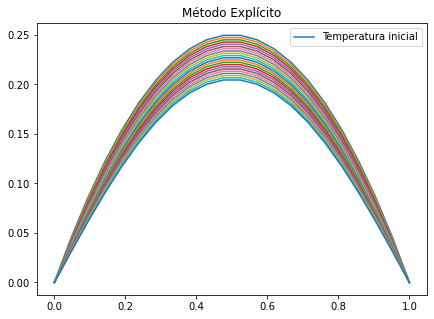

In [46]:
EulerExp(20,20)

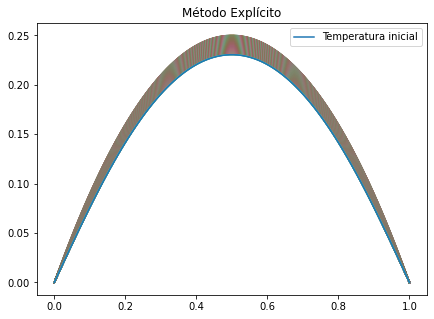

In [10]:
EulerExp(100,200)

In [11]:
def EulerImp(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T
    
    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones
    
    #definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([-lamb, 1+2*lamb  ,-lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
#    A=np.zeros((m-1,m-1))
#    lamb = k*dt/h**2
#    for i in range(m-1):
#        A[i,i]=1+2*lamb    
#    for i in range(m-2):
#        A[i,i+1]=-lamb
#        A[i+1,i]=-lamb
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito')
    plt.show()


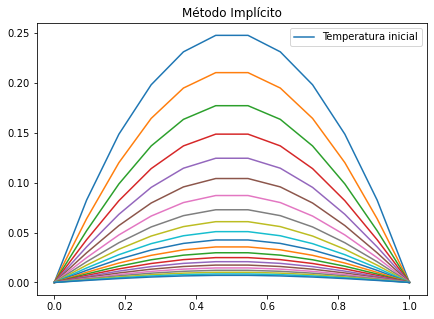

In [12]:
EulerImp(10,20)

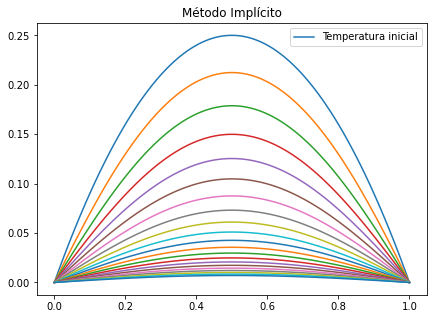

In [13]:
EulerImp(100,20)

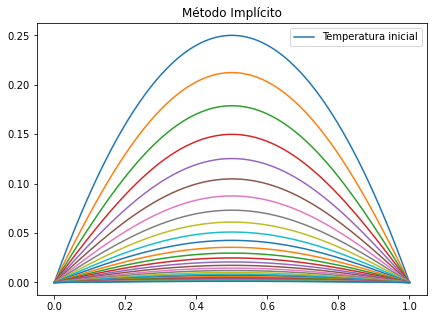

In [14]:
EulerImp(200,30)

In [15]:
def EulerTheta(M,N,theta=0.5):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T
    #paso en el tiempo
    if theta>=0.5 and theta<=1:
        dt = 0.1 #Definimos sin restricciones
    else:
        dt = h**2/(2*k*(1-2*theta))#Definimos bajo el máximo de la condición de Courant CFL
    #definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([-theta*lamb, 1+2*theta*lamb  ,-theta*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    
    #definiendo la matriz B
    B = diags([(1-theta)*lamb, 1-2*(1-theta)*lamb ,(1-theta)*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
#    A=np.zeros((m-1,m-1))
#    lamb = k*dt/h**2
#    for i in range(m-1):
#        A[i,i]=1+2*theta*lamb    
#    for i in range(m-2):
#        A[i,i+1]=-theta*lamb
#        A[i+1,i]=-theta*lamb
#    
#       #definiendo la matriz B
#    B=np.zeros((m-1,m-1))
#    for i in range(m-1):
#        B[i,i]=1-2*(1-theta)*lamb    
#    for i in range(m-2):
#        B[i,i+1]=(1-theta)*lamb
#        B[i+1,i]=(1-theta)*lamb
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(np.dot(np.linalg.inv(A),B),Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta '+str(theta))
    plt.show()


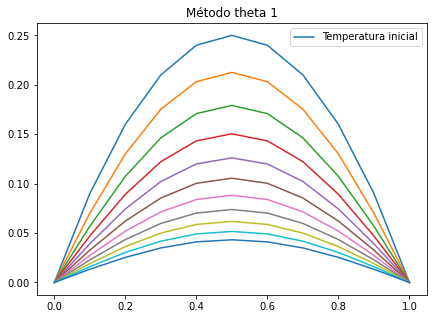

In [16]:
EulerTheta(9, 10,1)

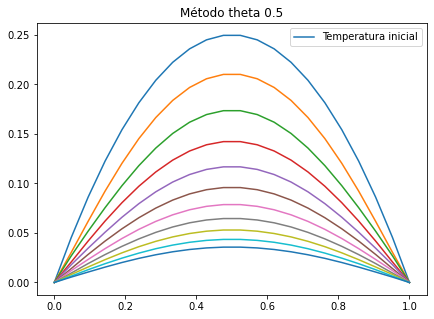

In [17]:
EulerTheta(20, 10,0.5)

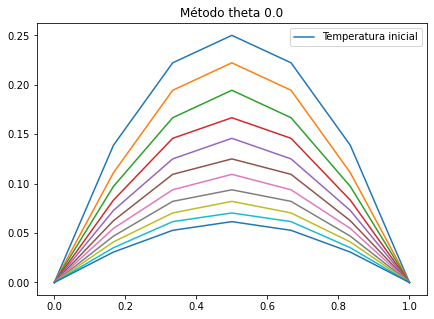

In [18]:
EulerTheta(5, 10,0.)

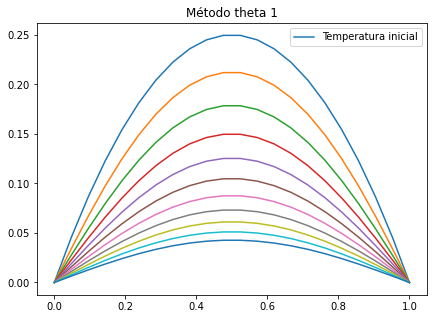

In [19]:
EulerTheta(20, 10,1)

# Veamos ahora el siguiente problema.

# Condiciones de contorno Direchlet homogéneas, material no homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-(k(x)u_{x})_x=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=u(L)=0
\end{cases}
$$

In [20]:
def PrbkVariable(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k = lambda x : 0.61*x+0.2 #difusividad térmica (m^2/s)


    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    X = np.linspace(a, b, 2*m+1)
    K = k(X)
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T

    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones

    #definiendo la matriz A
    A1 = [1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1]) for i in range (m-1)]
    A2 = [-dt/h**2*K[2*(i+1)+1] for i in range (m-2)]
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
#    A=np.zeros((m-1,m-1))
#    for i in range(m-1):
#        A[i,i]=1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1])    
#    for i in range(m-2):
#        A[i,i+1]=-dt/h**2*K[2*(i+1)+1]
#        A[i+1,i]=-dt/h**2*K[2*(i+1)+1]
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito')
    plt.show()

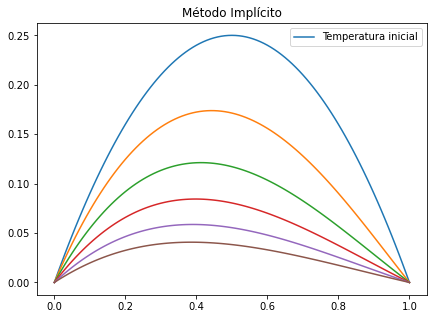

In [21]:
PrbkVariable(99,5)

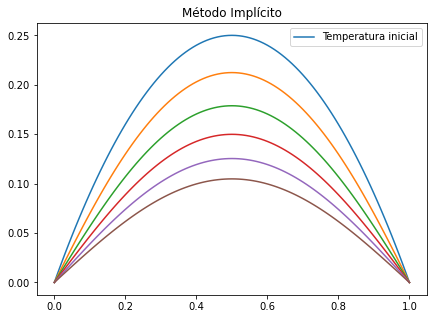

In [22]:
EulerImp(99,5)

# Condiciones de contorno Direchlet no homogéneas, material homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=g_1(t), \hspace{3mm}u(L)=g_2(t)
\end{cases}
$$


In [23]:
def EulerTheta(M,N,theta=1):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.1*t+0
    Tb= lambda t : 0.*t+0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[-1] = Tb(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[1:-1] = T
    #paso en el tiempo
    if theta>=0.5 and theta<=1:
        dt = 0.1 #Definimos sin restricciones
    else:
        dt = h**2/(2*k*(1-2*theta))#Definimos bajo el máximo de la condición de Courant CFL
    #definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([-theta*lamb, 1+2*theta*lamb  ,-theta*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    
    #definiendo la matriz B
    B = diags([(1-theta)*lamb, 1-2*(1-theta)*lamb ,(1-theta)*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b
        b = np.zeros(m-1)
        b[0] = (1-theta)*lamb*Ta(tm-dt)+theta*lamb*Ta(tm)
        b[-1] = (1-theta)*lamb*Tb(tm-dt)+theta*lamb*Tb(tm)
        T = np.dot(np.dot(np.linalg.inv(A),B),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = Ta(tm)
        Tamp[-1] = Tb(tm)
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta CC Newmann no Homogéneas')
    plt.show()


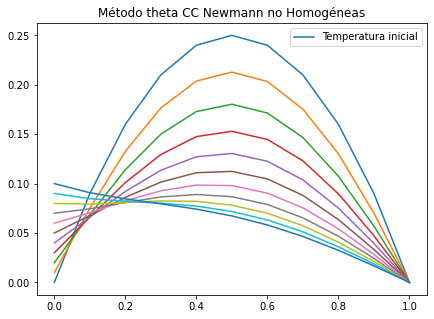

In [24]:
EulerTheta(9, 10,1)

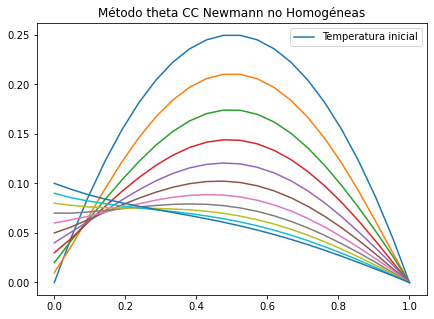

In [25]:
EulerTheta(20, 10,0.5)

# Veamos ahora el siguiente problema.
# Condiciones de contorno Direchlet no homogéneas, material no homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-(k(x)u_{x})_x=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=g_1(t), \hspace{3mm}u(L)=g_2(t)
\end{cases}
$$

In [26]:
def PrbkVariable(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k = lambda x : 0.61*x+0.2 #difusividad térmica (m^2/s)


    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    X = np.linspace(a, b, 2*m+1)
    K = k(X)
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.1*t+0.0
    Tb= lambda t : 0.1*t+0.0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)
    Tamp[-1] = Tb(0)
    Tamp[1:-1] = T

    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones

    #definiendo la matriz A
    A1 = [1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1]) for i in range (m-1)]
    A2 = [-dt/h**2*K[2*(i+1)+1] for i in range (m-2)]
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b(j)
        b = np.zeros(m-1)
        b[0] = dt/h**2*(K[1]*Ta(tm))
        b[-1] = dt/h**2*(K[-2]*Tb(tm))
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = Ta(tm)
        Tamp[-1] = Tb(tm)
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito CC no Homogéneas')
    plt.show()



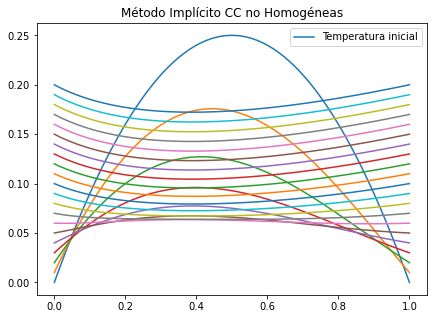

In [27]:
PrbkVariable(99,20)

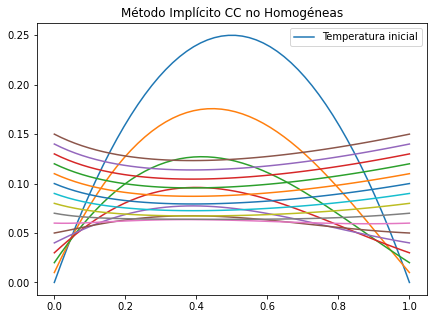

In [28]:
PrbkVariable(50,15)

# Condiciones de contorno Newmann no homogéneas, material  homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u_x(0)=g_1(t), \hspace{3mm}u_x(L)=g_2(t)
\end{cases}
$$


In [29]:
def EulerTheta(M,N,theta=1):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0*t+0
    Tb= lambda t : 0*t+0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[-1] = Tb(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[1:-1] = T
    #paso en el tiempo
    if theta>=0.5 and theta<=1:
        dt = 0.1 #Definimos sin restricciones
    else:
        dt = h**2/(2*k*(1-2*theta))#Definimos bajo el máximo de la condición de Courant CFL
    #definiendo la matriz A
    lamb = k*dt/h**2
    A1=np.zeros(m-1)
    for i in range(m-1):
        if i == 0:
            A1[i]=1+theta*lamb
        elif i == m-2:
            A1[i]=1+theta*lamb 
        else:        
            A1[i]=1+2*theta*lamb
    A2= -theta*lamb*np.ones(m-2)
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
    
    #definiendo la matriz B
    B1=np.zeros(m-1)
    for i in range(m-1):
        if i == 0:
            B1[i]=1-(1-theta)*lamb
        elif i == m-2:
            B1[i]=1-(1-theta)*lamb
        else:        
            B1[i]=1-2*(1-theta)*lamb
    B2= (1-theta)*lamb*np.ones(m-2)
    B = diags([B1,B2,B2], [0,-1,1]).toarray()

    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b
        b = np.zeros(m-1)
        b[0] = -h*(1-theta)*lamb*Ta(tm-dt)-h*theta*lamb*Ta(tm)
        b[-1] = h*(1-theta)*lamb*Tb(tm-dt)+h*theta*lamb*Tb(tm)
        T = np.dot(np.dot(np.linalg.inv(A),B),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = T[0]-h*Ta(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[-1] = T[-1]+h*Tb(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta CC Newmann no Homogéneas')
    plt.show()



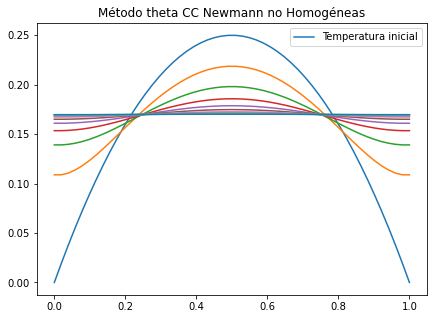

In [30]:
EulerTheta(50, 10,1)

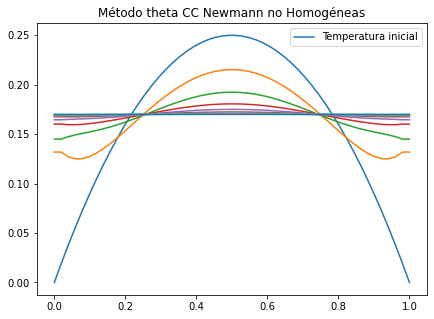

In [31]:
EulerTheta(50, 10,0.7)

# Veamos ahora el siguiente problema.

# Condiciones de contorno Newmann no homogéneas, material no homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-(k(x)u_{x})_x=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=g_1(t), \hspace{3mm}u(L)=g_2(t)
\end{cases}
$$

In [32]:
def PrbkVariable(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    #k = lambda x : 0.*x+0.2 #difusividad térmica (m^2/s)
    k = lambda x : 0.61*x+0.2 #difusividad térmica (m^2/s)


    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    X = np.linspace(a, b, 2*m+1)
    K = k(X)
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.5*t+0.0
    Tb= lambda t : 0.*t+0.0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)
    Tamp[-1] = Tb(0)
    Tamp[1:-1] = T

    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones

    #definiendo la matriz A
    A1=np.zeros(m-1)
    for i in range(m-1):
        if i == 0:
            A1[i]=1+dt/h**2*(K[2*(i+1)+1]) 
        elif i == m-2:
            A1[i]=1+dt/h**2*(K[2*i+1])
        else:        
            A1[i]=1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1])    

    A2=[-dt/h**2*K[2*(i+1)+1] for i in range(m-2)]
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = u_{j-1}+b(j)
        b = np.zeros(m-1)
        b[0] = -dt/h*(K[1]*Ta(tm))
        b[-1] = dt/h*(K[-2]*Tb(tm))
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = T[0]-h*Ta(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[-1] = T[-1]+h*Tb(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito CC no Homogéneas tipo Newmann')
    plt.show()



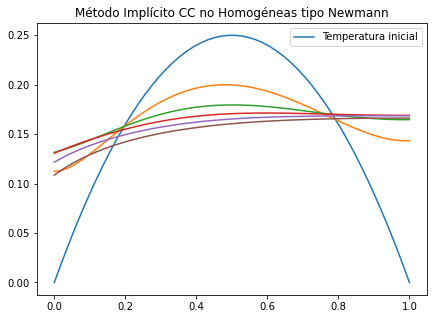

In [33]:
PrbkVariable(50,5)

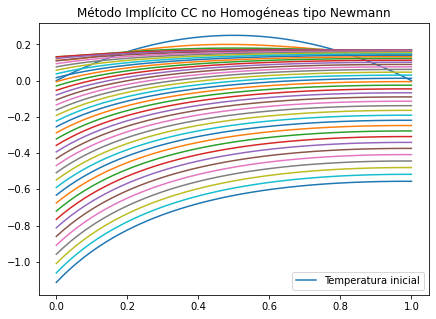

In [34]:
PrbkVariable(50,40)

# Condiciones de contorno Newmann no homogéneas, material  homogéneo. 
# Segunda forma.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u_x(0)=g_1(t), \hspace{3mm}u_x(L)=g_2(t)
\end{cases}
$$

En esta ocasión, vamos a estudiar la aproximación de las derivadas en la frontera mediante **diferencias centradas**, lo que nos da un mejor orden de convergencia, $\sigma(h^2)$.

In [35]:
def EulerImp(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.1*t+0.0
    Tb= lambda t : 0.*t+0.0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)
    Tamp[-1] = Tb(0)
    Tamp[1:-1] = T
    
    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones
    
    #definiendo la matriz A
    lamb = k*dt/h**2
    A3 = (1+2*lamb)*np.ones(m+1)
    A1 = np.zeros(m)
    A2 = np.zeros(m)
    for i in range(m):
        if i==0:
            A1[i]=-2*lamb
            A2[i]=-lamb 
        elif i == m-1:
            A1[i]=-lamb
            A2[i]=-2*lamb
        else:
            A1[i]=-lamb
            A2[i]=-lamb
    A = diags([A3,A1,A2],[0,1,-1]).toarray()

    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b
        b = np.zeros(m+1)
        b[0] = -2*h*lamb*Ta(tm)
        b[-1] = 2*h*lamb*Tb(tm)
        Tamp = np.dot(np.linalg.inv(A),Tamp)+np.dot(np.linalg.inv(A),b)
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta CC Newmann no Homogéneas')
    plt.show()


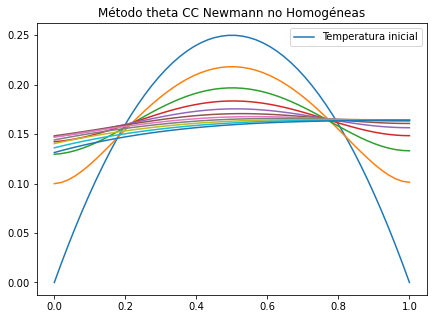

In [36]:
EulerImp(50,10)

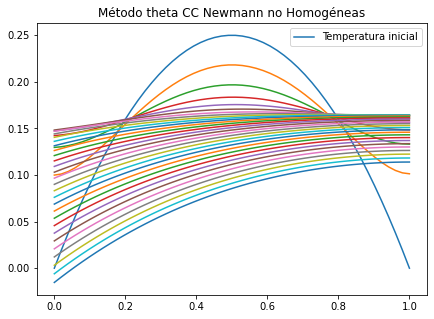

In [37]:
EulerImp(50,30)